In [1]:
import pandas as pd

df = pd.read_csv('alphanorm.csv')
dftwo = pd.read_csv('twoalphas.csv')
df.dropna(inplace=True)
dftwo.dropna(inplace=True)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 202
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        200 non-null    object 
 1   hb         200 non-null    float64
 2   pcv        200 non-null    float64
 3   rbc        200 non-null    float64
 4   mcv        200 non-null    float64
 5   mch        200 non-null    float64
 6   mchc       200 non-null    float64
 7   rdw        200 non-null    float64
 8   wbc        200 non-null    float64
 9   neut       200 non-null    float64
 10  lymph      200 non-null    float64
 11  plt        200 non-null    float64
 12  hba        200 non-null    float64
 13  hba2       200 non-null    float64
 14  hbf        200 non-null    float64
 15  phenotype  200 non-null    object 
dtypes: float64(14), object(2)
memory usage: 26.6+ KB


In [3]:
df.describe()

,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,12.12450,36.703926,5.054700,74.236400,24.143500,32.496926,14.846755,9.193849,46.091068,43.600715,329.414648,86.496086,2.581005,0.662223
std,1.76537,4.849943,0.587602,9.328095,3.728399,1.991288,2.393332,2.603430,11.880916,12.008082,114.322009,2.447938,0.315008,0.744021
min,7.60000,22.100000,2.410000,47.700000,11.100000,21.100000,10.800000,2.300000,6.200000,10.300000,100.000000,68.000000,0.300000,0.000000
25%,10.90000,33.300000,4.697500,66.975000,21.200000,31.500000,13.300000,7.500000,43.000000,37.000000,257.500000,85.200000,2.500000,0.300000
50%,12.05000,36.000000,5.020000,74.500000,24.100000,32.500000,14.700000,8.915278,47.565000,41.537931,310.500000,86.523291,2.600000,0.537931
75%,13.40000,39.225000,5.432500,82.000000,26.800000,33.446296,15.925000,10.525000,52.425000,46.000000,381.000000,87.348571,2.700000,0.769231
max,16.70000,51.100000,6.770000,91.700000,32.100000,40.800000,28.800000,20.400000,77.500000,87.000000,1107.000000,98.400000,3.300000,5.800000


In [4]:
df.shape

(200, 16)

In [5]:
df.columns

Index(['sex', 'hb', 'pcv', 'rbc', 'mcv', 'mch', 'mchc', 'rdw', 'wbc', 'neut',
       'lymph', 'plt', 'hba', 'hba2', 'hbf', 'phenotype'],
      dtype='object')

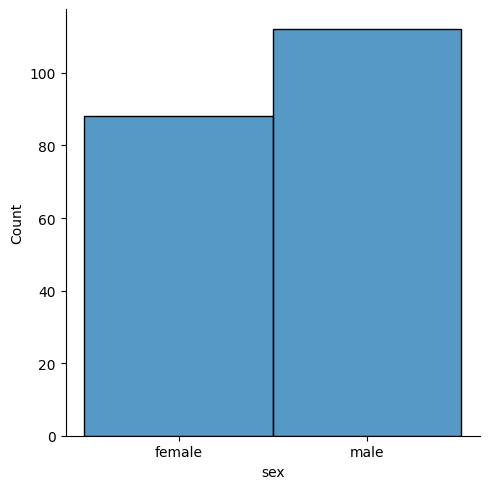

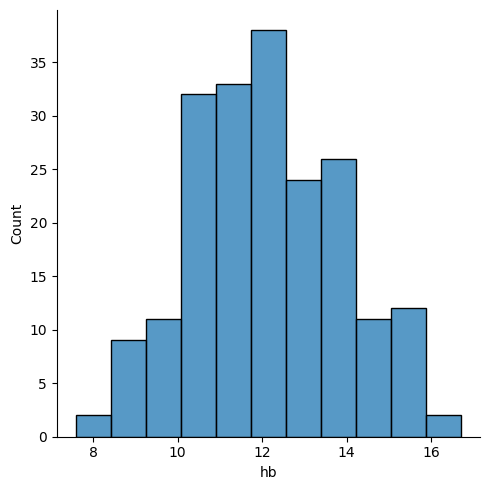

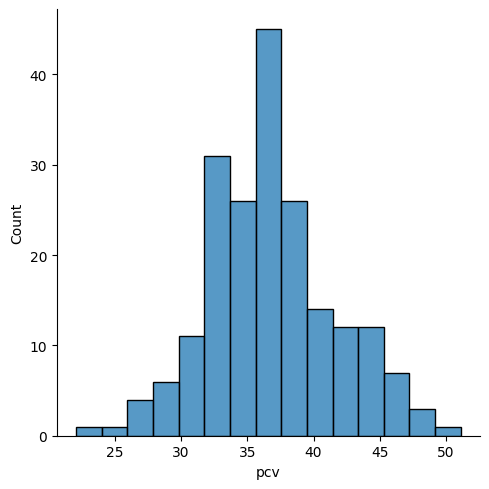

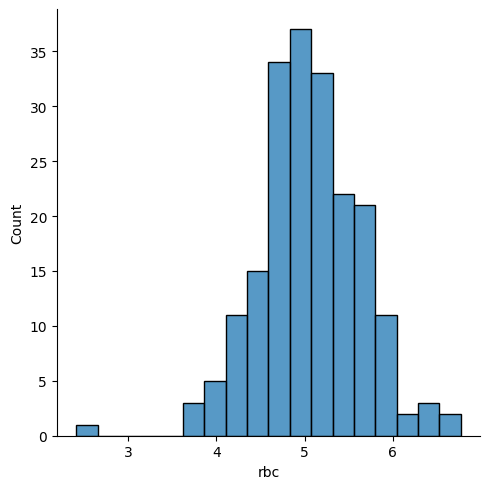

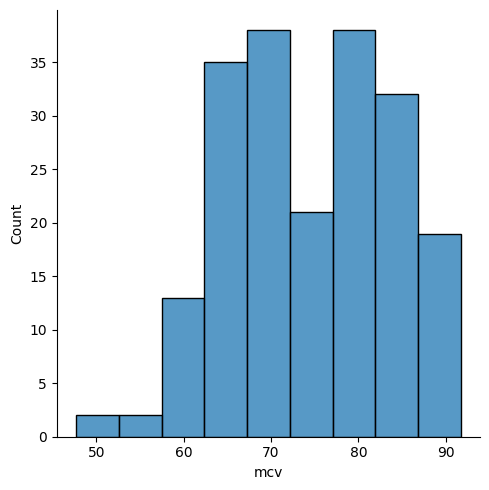

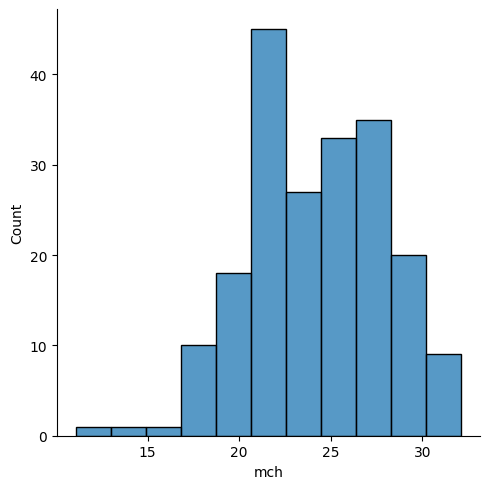

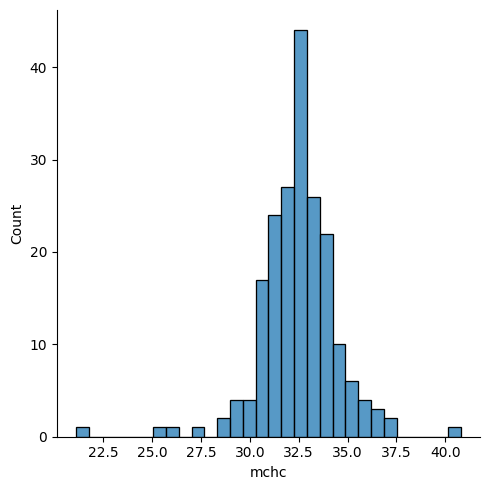

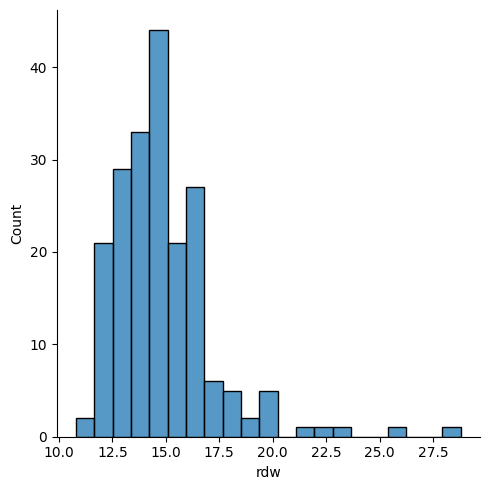

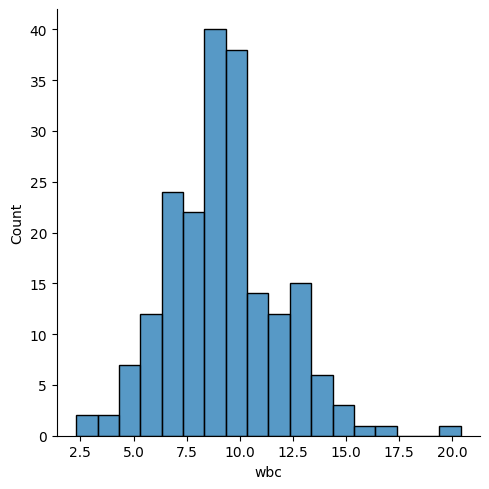

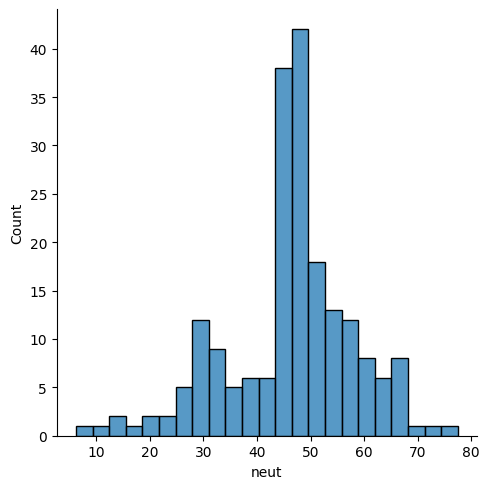

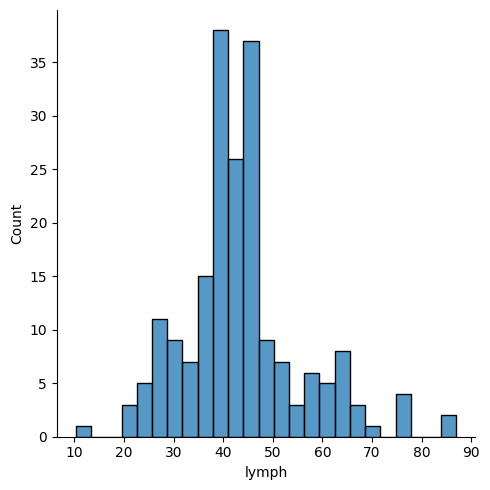

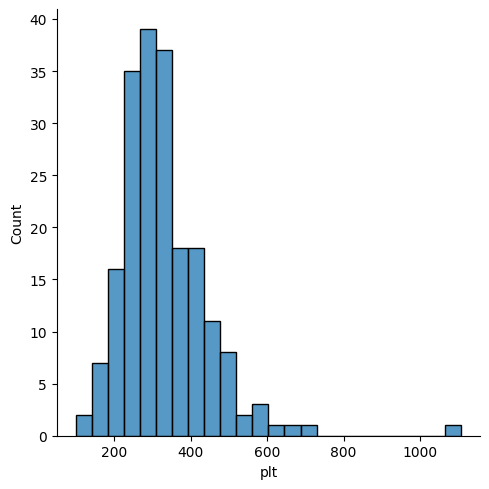

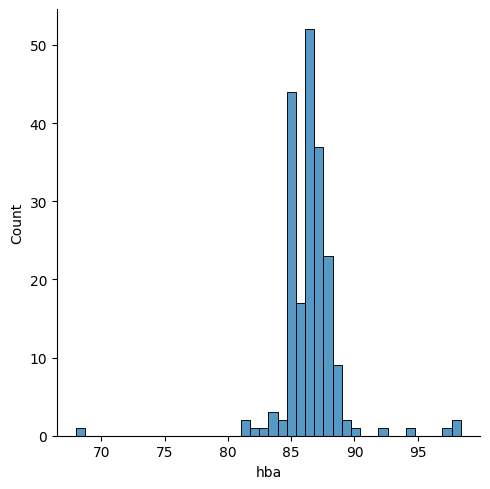

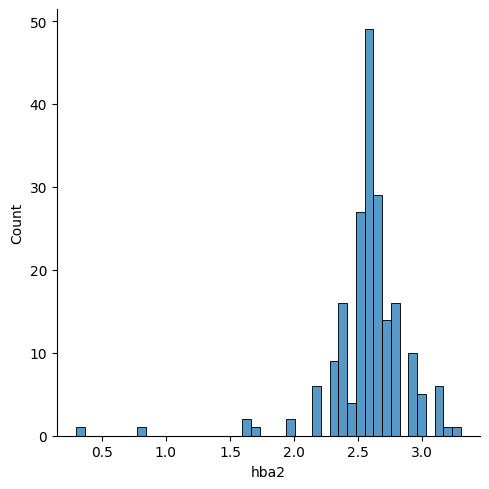

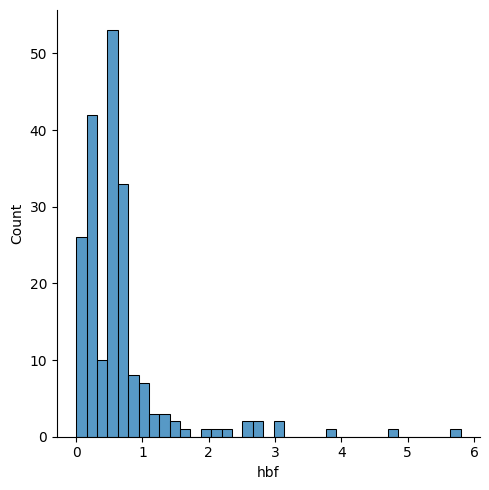

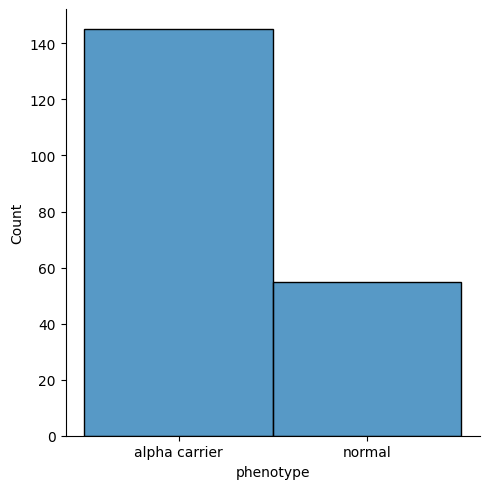

In [6]:
import seaborn as sns

for col in df.columns:
    sns.displot(df[col])

df = df.select_dtypes(include=['int64', 'float64'])
dftwo = dftwo.select_dtypes(include=['int64', 'float64'])

In [7]:
df.columns

Index(['hb', 'pcv', 'rbc', 'mcv', 'mch', 'mchc', 'rdw', 'wbc', 'neut', 'lymph',
       'plt', 'hba', 'hba2', 'hbf'],
      dtype='object')

In [8]:
normal_test_columns = df.columns

#shapiro test
from scipy.stats import shapiro
shapiro_alpha_h0 = []
shapiro_twoalpha_h0 = []
print("alhanorm")
for col in df[normal_test_columns]:
    stat, p = shapiro(df[col])
    print(f'{col} -> Statistics={stat}, p={p}')
    #print column name
    alpha = 0.05
    if p > alpha:
        print(f'{col}  (fail to reject H0)', '\n')
        shapiro_alpha_h0.append('passed')
    else:
        print(f'{col}  (reject H0)', '\n')
        shapiro_alpha_h0.append('failed')

print("twoalphas")
for col in dftwo[normal_test_columns]:
    stat, p = shapiro(dftwo[col])
    print(f'{col} -> Statistics={stat}, p={p}')
    #print column name
    alpha = 0.05
    if p > alpha:
        print(f'{col}  (fail to reject H0)', '\n')
        shapiro_twoalpha_h0.append('passed')
    else:
        print(f'{col}  (reject H0)', '\n')
        shapiro_twoalpha_h0.append('failed')

alhanorm
hb -> Statistics=0.9926419115985089, p=0.4150692715266713
hb  (fail to reject H0) 

pcv -> Statistics=0.9863205299096547, p=0.05037038958508204
pcv  (fail to reject H0) 

rbc -> Statistics=0.9820902863278772, p=0.011872489362366904
rbc  (reject H0) 

mcv -> Statistics=0.9736770547931557, p=0.0008239753531593958
mcv  (reject H0) 

mch -> Statistics=0.9839415177389179, p=0.022205338832360824
mch  (reject H0) 

mchc -> Statistics=0.9097710675264666, p=1.1039414416511946e-09
mchc  (reject H0) 

rdw -> Statistics=0.8495938718435021, p=4.110059530451643e-13
rdw  (reject H0) 

wbc -> Statistics=0.9756353607488559, p=0.0014918658928290112
wbc  (reject H0) 

neut -> Statistics=0.9628619946635705, p=4.0870681039441245e-05
neut  (reject H0) 

lymph -> Statistics=0.9403524308773745, p=2.45997165605664e-07
lymph  (reject H0) 

plt -> Statistics=0.8725430912983259, p=6.1559749475023274e-12
plt  (reject H0) 

hba -> Statistics=0.7019956112669444, p=1.265671740616635e-18
hba  (reject H0) 

hb

In [9]:
# D'Agostino's K^2 Test
from scipy.stats import normaltest
dagostino_alpha_h0 = []
dagostino_twoalpha_h0 = []
print("alphanorm")
for col in df.columns:
    stat, p = normaltest(df[col])
    print(f'{col} -> Statistics={stat}, p={p}')
    #print column name
    alpha = 0.05
    if p > alpha:
        print(f'{col}  (fail to reject H0)', '\n')
        dagostino_alpha_h0.append('passed')
    else:
        print(f'{col}  (reject H0)', '\n')
        dagostino_alpha_h0.append('failed')

print("twoalphas")

for col in dftwo.columns:
    stat, p = normaltest(dftwo[col])
    print(f'{col} -> Statistics={stat}, p={p}')
    #print column name
    alpha = 0.05
    if p > alpha:
        print(f'{col}  (fail to reject H0)', '\n')
        dagostino_twoalpha_h0.append('passed')
    else:
        print(f'{col}  (reject H0)', '\n')
        dagostino_twoalpha_h0.append(col)


alphanorm
hb -> Statistics=2.1425338186793073, p=0.34257423188269687
hb  (fail to reject H0) 

pcv -> Statistics=2.768558463438476, p=0.2505042902846031
pcv  (fail to reject H0) 

rbc -> Statistics=10.754393668981892, p=0.0046207565379524935
rbc  (reject H0) 

mcv -> Statistics=11.066869293142334, p=0.0039523906844899336
mcv  (reject H0) 

mch -> Statistics=0.8536020856076083, p=0.6525933774612758
mch  (fail to reject H0) 

mchc -> Statistics=58.583952642861405, p=1.8995744501701264e-13
mchc  (reject H0) 

rdw -> Statistics=109.87573361084036, p=1.3828898812864254e-24
rdw  (reject H0) 

wbc -> Statistics=17.04805026912514, p=0.0001986382683041122
wbc  (reject H0) 

neut -> Statistics=11.404744056348903, p=0.0033380381387640035
neut  (reject H0) 

lymph -> Statistics=29.50056160594184, p=3.926760744570236e-07
lymph  (reject H0) 

plt -> Statistics=117.53404892104028, p=3.004730732025139e-26
plt  (reject H0) 

hba -> Statistics=79.74990428758727, p=4.814246438521846e-18
hba  (reject H0) 

In [10]:
#Anderson-Darling Test
from scipy.stats import anderson
anderson_alpha_h0 = []
anderson_twoalpha_h0 = []
print("alphanorm")
for col in df.columns:
    result = anderson(df[col])
    print(f'{col} -> Statistic: {result.statistic}')
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print(f'{col}  (fail to reject H0)', 'with significance level:', sl, 'critical value', cv, '\n',)
            anderson_alpha_h0.append(col)
        else:
            print(f'{col}  (reject H0)', 'with significance level:', sl, 'critical value', cv, '\n')
            anderson_alpha_h0.append('failed')

print("twoalphas")
for col in dftwo.columns:
    result = anderson(dftwo[col])
    print(f'{col} -> Statistic: {result.statistic}')
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print(f'{col}  (fail to reject H0)', 'with significance level:', sl,'critical value', cv , '\n')
            anderson_twoalpha_h0.append(col)
        else:
            print(f'{col}  (reject H0)', 'with significance level:', sl,"critical value", cv , '\n')
            anderson_twoalpha_h0.append('failed')

alphanorm
hb -> Statistic: 0.4283531230803135
hb  (fail to reject H0) with significance level: 15.0 critical value 0.565 

hb  (fail to reject H0) with significance level: 10.0 critical value 0.644 

hb  (fail to reject H0) with significance level: 5.0 critical value 0.772 

hb  (fail to reject H0) with significance level: 2.5 critical value 0.901 

hb  (fail to reject H0) with significance level: 1.0 critical value 1.071 

pcv -> Statistic: 1.2677135111824214
pcv  (reject H0) with significance level: 15.0 critical value 0.565 

pcv  (reject H0) with significance level: 10.0 critical value 0.644 

pcv  (reject H0) with significance level: 5.0 critical value 0.772 

pcv  (reject H0) with significance level: 2.5 critical value 0.901 

pcv  (reject H0) with significance level: 1.0 critical value 1.071 

rbc -> Statistic: 0.4111785242156998
rbc  (fail to reject H0) with significance level: 15.0 critical value 0.565 

rbc  (fail to reject H0) with significance level: 10.0 critical value 0.6

In [12]:
test_df = pd.DataFrame({
    'shapiro_alpha_h0': shapiro_alpha_h0,
    'shapiro_twoalpha_h0': shapiro_twoalpha_h0,
    'dagostino_alpha_h0': dagostino_alpha_h0,
    'dagostino_twoalpha_h0': dagostino_twoalpha_h0,
}, index=df.columns)

In [13]:
print(test_df)

      shapiro_alpha_h0 shapiro_twoalpha_h0 dagostino_alpha_h0  \
hb              passed              passed             passed   
pcv             passed              failed             passed   
rbc             failed              failed             failed   
mcv             failed              passed             failed   
mch             failed              failed             passed   
mchc            failed              failed             failed   
rdw             failed              failed             failed   
wbc             failed              failed             failed   
neut            failed              failed             failed   
lymph           failed              failed             failed   
plt             failed              failed             failed   
hba             failed              failed             failed   
hba2            failed              failed             failed   
hbf             failed              failed             failed   

      dagostino_twoalpha

In [14]:
# Function to perform Anderson-Darling test and store results
def anderson_test_results(df):
    result_dict = {}
    for col in df.columns:
        result = anderson(df[col])
        significance_levels = result.significance_level
        critical_values = result.critical_values
        stats = result.statistic
        test_results = []
        for sl, cv in zip(significance_levels, critical_values):
            if stats < cv:
                test_results.append('fail to reject H0')
            else:
                test_results.append('reject H0')
        result_dict[col] = test_results
    return result_dict, significance_levels

# Perform tests and store results
results_df, significance_levels = anderson_test_results(df)
results_dftwo, significance_levels_two = anderson_test_results(dftwo)

# Create DataFrames for results
results_df = pd.DataFrame(results_df, index=significance_levels)
results_dftwo = pd.DataFrame(results_dftwo, index=significance_levels_two)

# Print the results
print("Results for df:")
print(results_df)

print("\nResults for dftwo:")
print(results_dftwo)

Results for df:
                     hb        pcv                rbc        mcv  \
15.0  fail to reject H0  reject H0  fail to reject H0  reject H0   
10.0  fail to reject H0  reject H0  fail to reject H0  reject H0   
5.0   fail to reject H0  reject H0  fail to reject H0  reject H0   
2.5   fail to reject H0  reject H0  fail to reject H0  reject H0   
1.0   fail to reject H0  reject H0  fail to reject H0  reject H0   

                    mch       mchc        rdw        wbc       neut  \
15.0          reject H0  reject H0  reject H0  reject H0  reject H0   
10.0          reject H0  reject H0  reject H0  reject H0  reject H0   
5.0           reject H0  reject H0  reject H0  reject H0  reject H0   
2.5           reject H0  reject H0  reject H0  reject H0  reject H0   
1.0   fail to reject H0  reject H0  reject H0  reject H0  reject H0   

          lymph        plt        hba       hba2        hbf  
15.0  reject H0  reject H0  reject H0  reject H0  reject H0  
10.0  reject H0  reject 

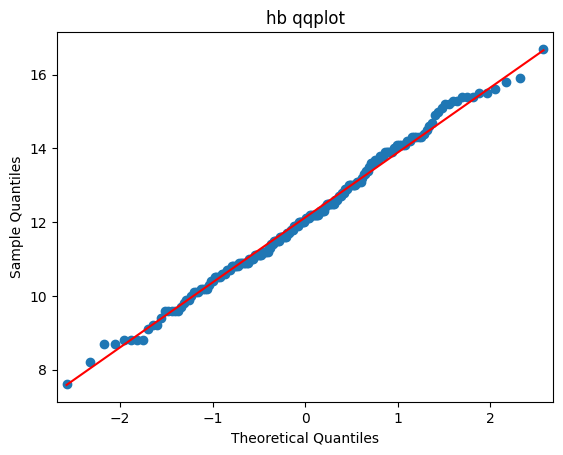

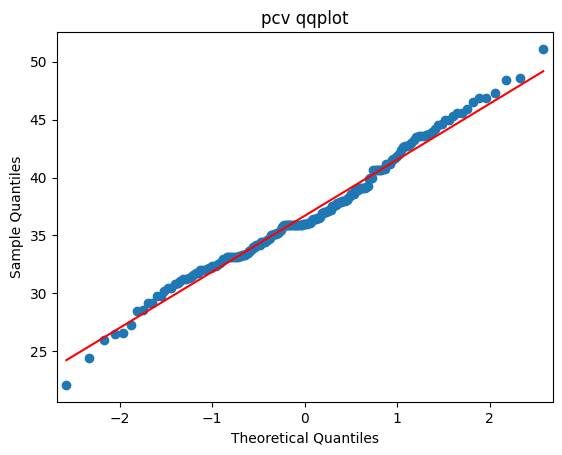

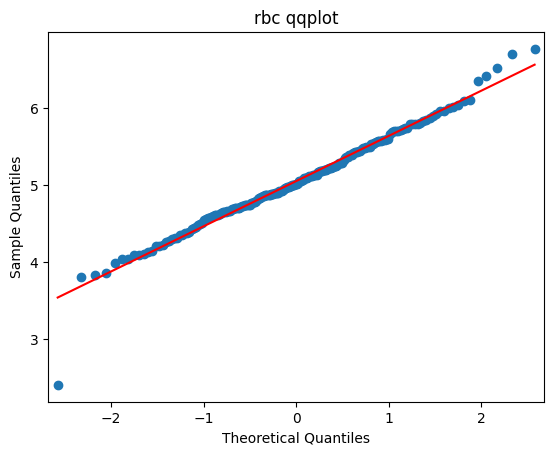

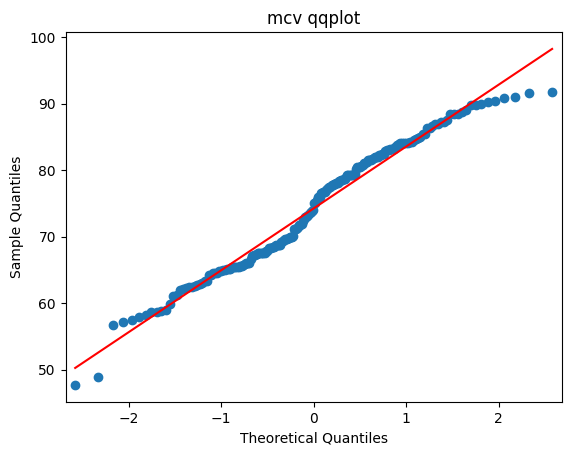

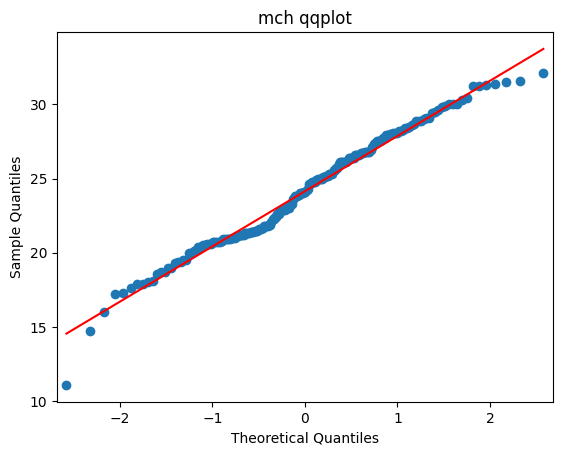

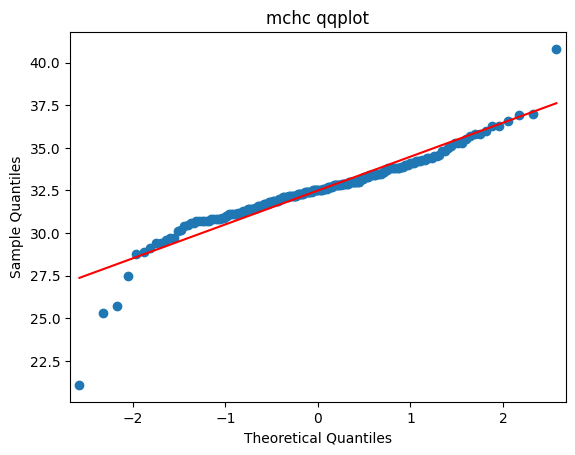

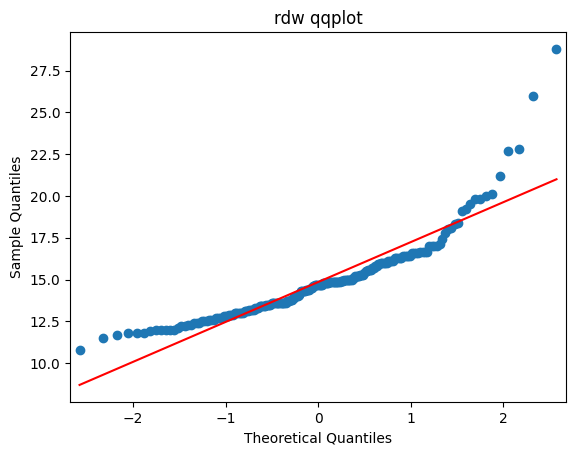

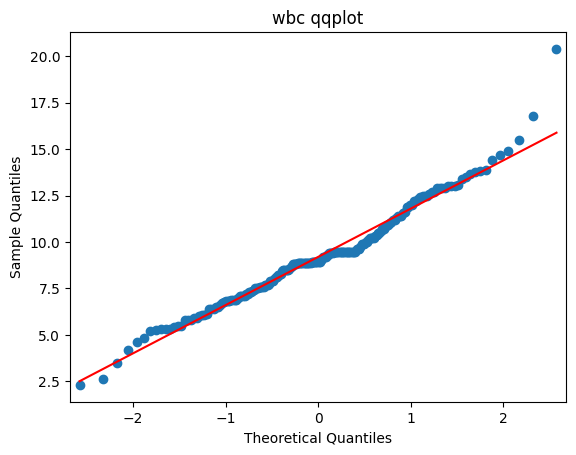

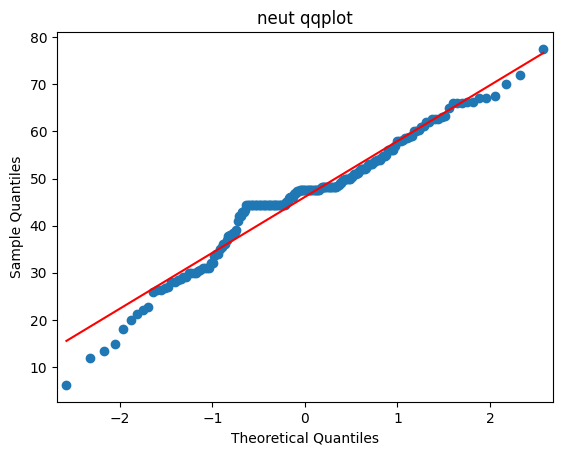

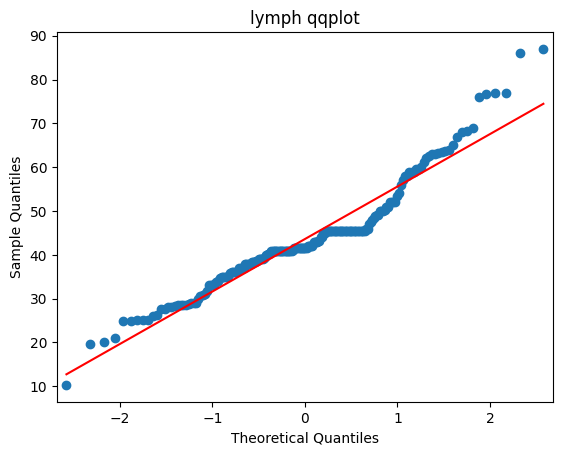

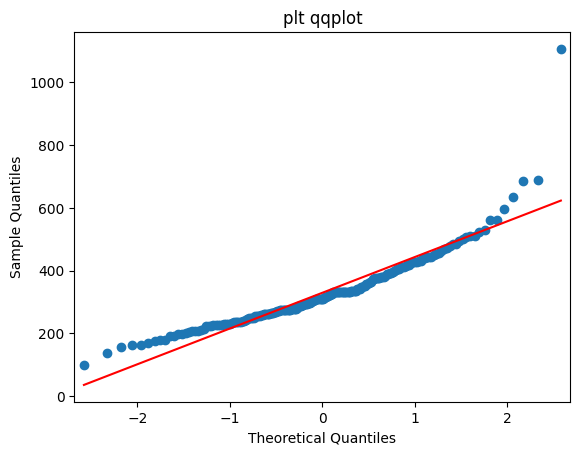

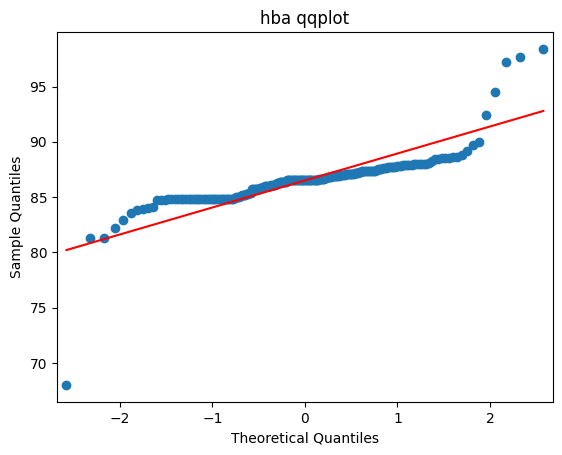

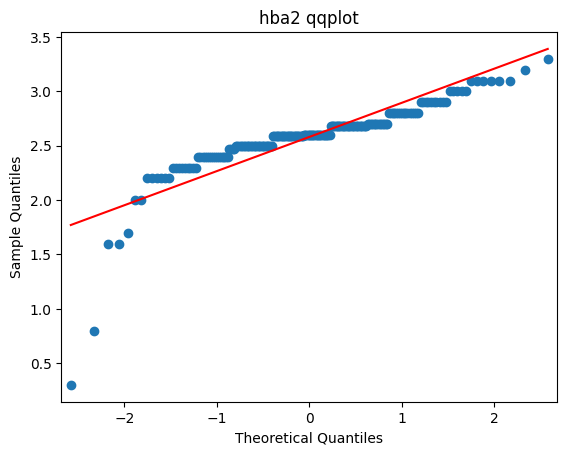

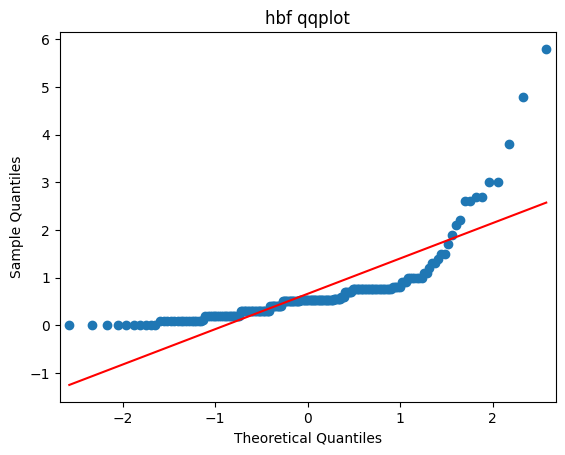

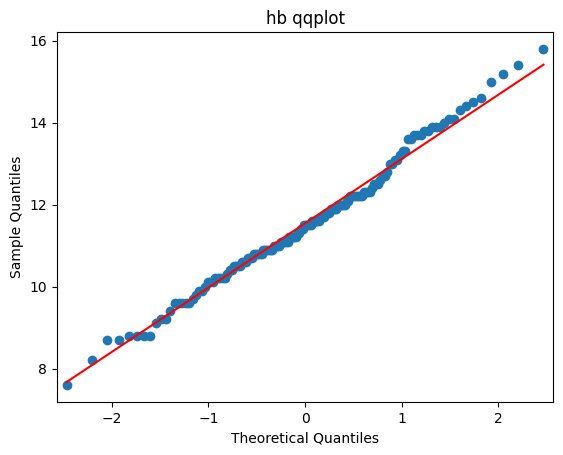

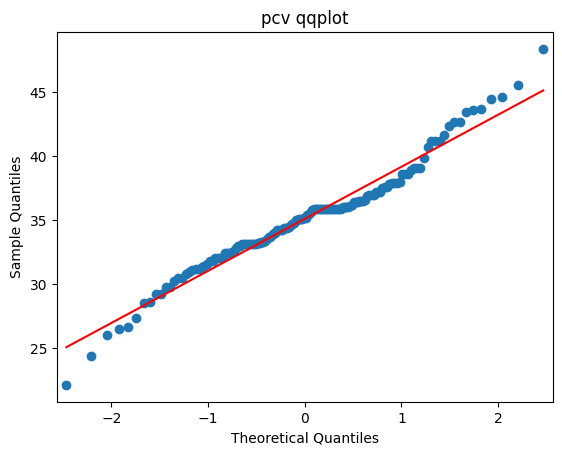

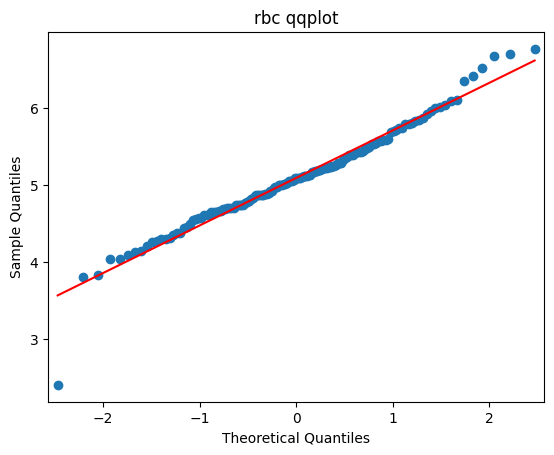

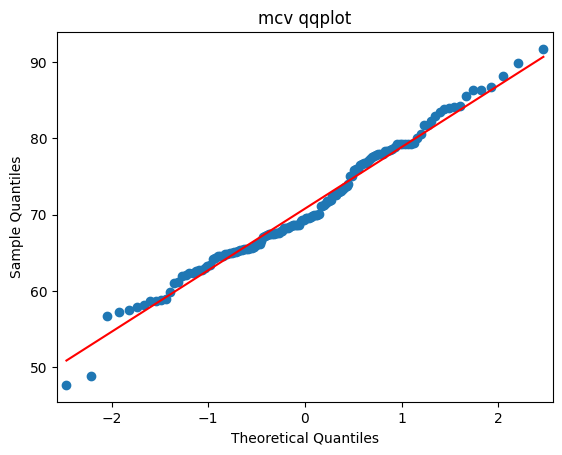

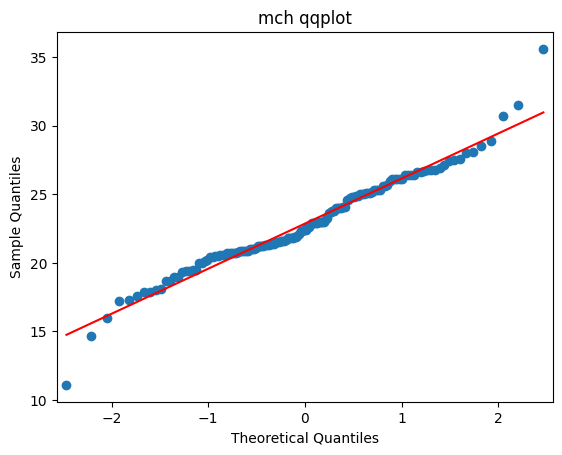

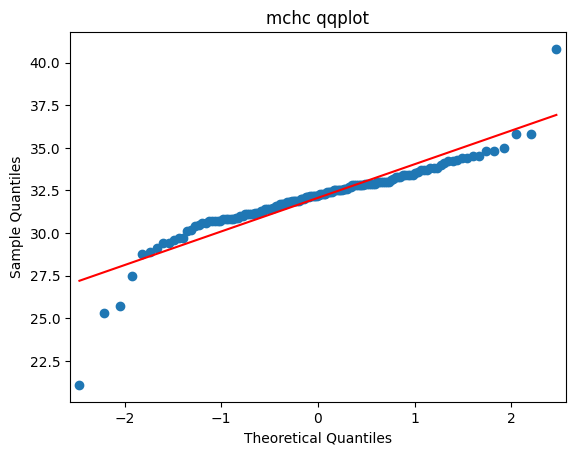

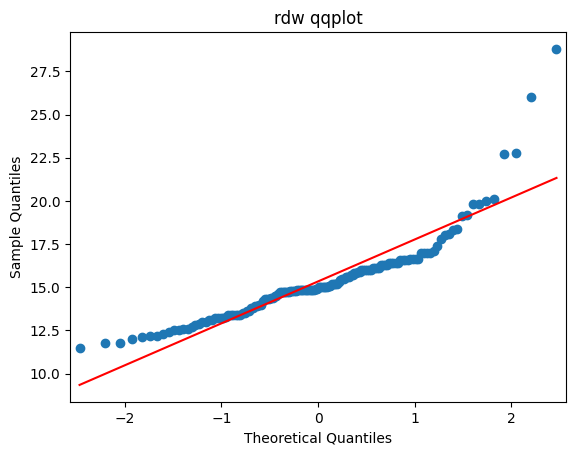

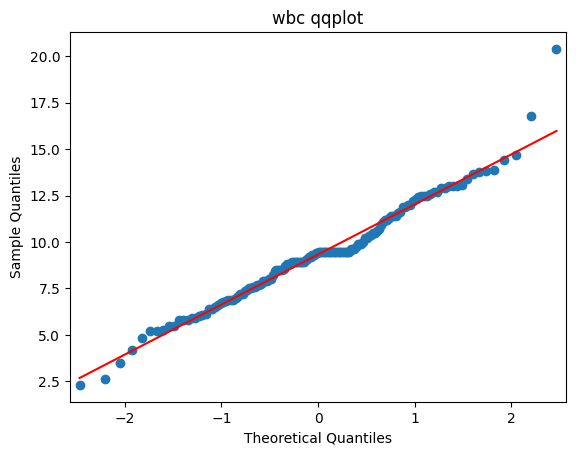

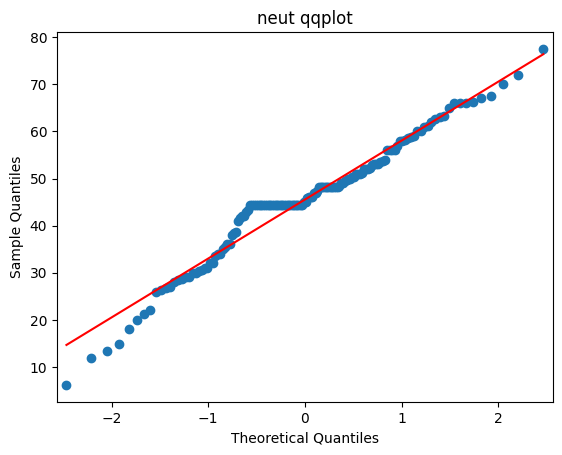

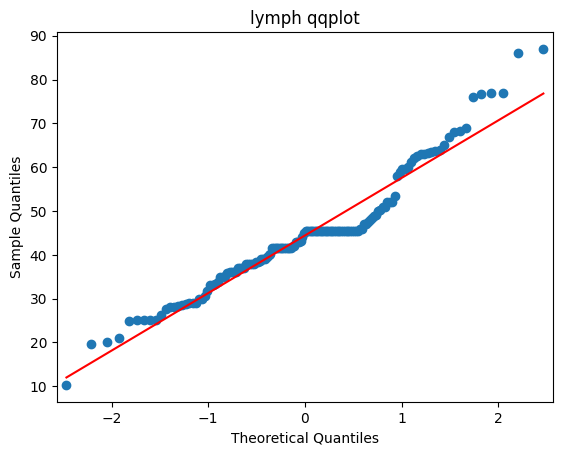

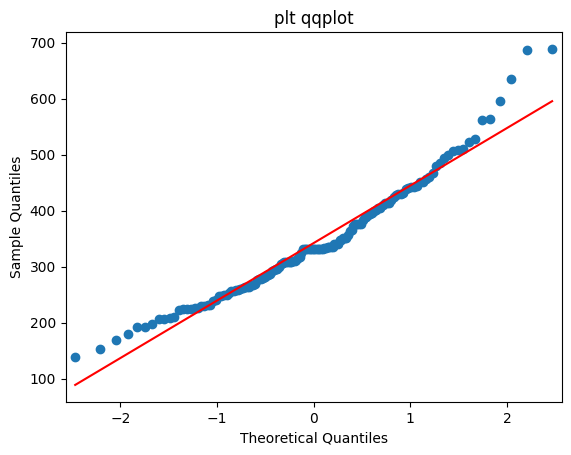

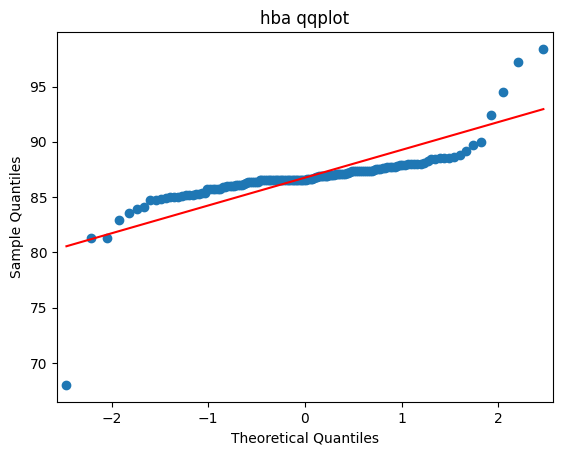

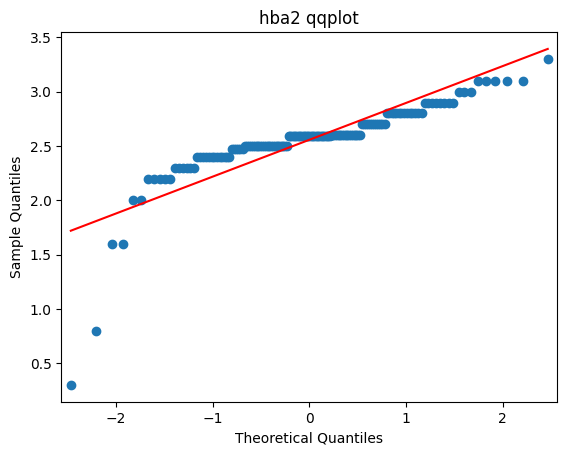

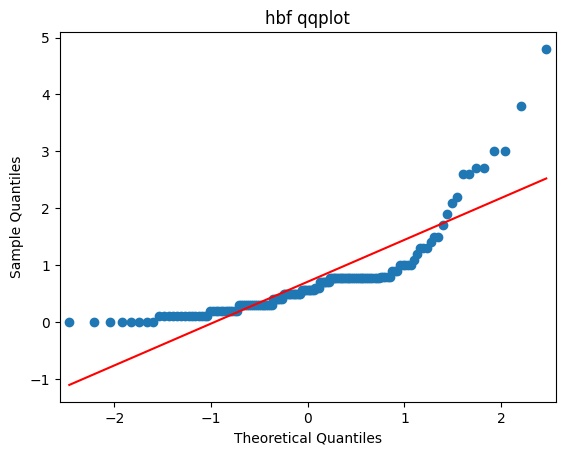

In [16]:
# visualize the results
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

for col in df.columns:
    qqplot(df[col], line='s')
    plt.title(f'{col} qqplot')
    plt.show()

for col in dftwo.columns:
    qqplot(dftwo[col], line='s')
    plt.title(f'{col} qqplot')
    plt.show()

# Shapiro-Wilk Test